# Recurrent Neural Net

### Quando alle reti neurali si aggiunge la memoria...

Nelle reti mostrate nelle serate precedenti ogni input è elaborato in modo indipendente dall'altro.
Questa mancanza di correlazione è addirittura un obbligo se si parla di regressione (multicollinearità).

Purtroppo accede nella realtà che i dati rappresentativi di un fenomeno siano correlati tra loro e quindi... perchè perdere questa informazione?

Un esempio pratico è il linguaggio naturale: per comprendere il significato di una frase dobbiamo leggere parola per parola, in sequenza, collegando il loro significato attraverso la loro memorizzazione.

Un esempio, di più facile comprensione, riguarda invece le serie temporali. In questi casi è ancora più immediata la comprensione della stretta correlazione che esiste tra i dati.

## Un esempio pratico

In [1]:
from IPython.display import Image

In [3]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

<IPython.core.display.Javascript object>

In [4]:
from sklearn.preprocessing import StandardScaler

<IPython.core.display.Javascript object>

In [5]:
scaler = StandardScaler()

<IPython.core.display.Javascript object>

### Generazione fake data

In [6]:
x_data = np.linspace(start=1, num=48, stop=48)
x_data

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
       40., 41., 42., 43., 44., 45., 46., 47., 48.])

<IPython.core.display.Javascript object>

In [7]:
trend = np.linspace(start=0.1, num=48, stop=4.8)
trend

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8])

<IPython.core.display.Javascript object>

In [8]:
y_data = np.sin(x_data) + trend
y_data

array([ 0.94147098,  1.10929743,  0.44112001, -0.3568025 , -0.45892427,
        0.3205845 ,  1.3569866 ,  1.78935825,  1.31211849,  0.45597889,
        0.10000979,  0.66342708,  1.72016704,  2.39060736,  2.15028784,
        1.31209668,  0.73860251,  1.04901275,  2.04987721,  2.91294525,
        2.93665564,  2.19114869,  1.4537796 ,  1.49442164,  2.36764825,
        3.36255845,  3.65637593,  3.07090579,  2.23636612,  2.01196838,
        2.69596235,  3.75142668,  4.29991186,  3.92908269,  3.07181733,
        2.60822115,  3.05646187,  4.09636858,  4.86379539,  4.74511316,
        3.94137733,  3.28347845,  3.46822526,  4.41770193,  5.35090352,
        5.50178835,  4.82357312,  4.03174534])

<IPython.core.display.Javascript object>

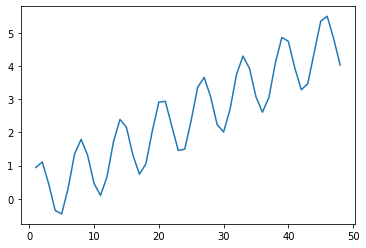

<IPython.core.display.Javascript object>

In [9]:
plt.plot(x_data, y_data)

In [10]:
y_data = scaler.fit_transform(y_data.reshape(-1, 1))

<IPython.core.display.Javascript object>

In [11]:
inputs = y_data

<IPython.core.display.Javascript object>

In [12]:
inputs[:10]

array([[-1.00044445],
       [-0.89083416],
       [-1.32723213],
       [-1.84836881],
       [-1.91506627],
       [-1.40595591],
       [-0.72906417],
       [-0.44667494],
       [-0.7583683 ],
       [-1.31752754]])

<IPython.core.display.Javascript object>

In [13]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

<IPython.core.display.Javascript object>

In [14]:
generator = TimeseriesGenerator(
    data=inputs,
    targets=inputs,
    length=12,  # lunghezza dati input
    batch_size=1,
    sampling_rate=1,  # step
    stride=1,
)

<IPython.core.display.Javascript object>

In [15]:
print("Samples: %d" % len(generator))

Samples: 36


<IPython.core.display.Javascript object>

In [16]:
for i in range(len(generator)):
    x, y = generator[i]
    print("%s => %s" % (x, y))

[[[-1.00044445]
  [-0.89083416]
  [-1.32723213]
  [-1.84836881]
  [-1.91506627]
  [-1.40595591]
  [-0.72906417]
  [-0.44667494]
  [-0.7583683 ]
  [-1.31752754]
  [-1.55001698]
  [-1.18203962]]] => [[-0.49186489]]
[[[-0.89083416]
  [-1.32723213]
  [-1.84836881]
  [-1.91506627]
  [-1.40595591]
  [-0.72906417]
  [-0.44667494]
  [-0.7583683 ]
  [-1.31752754]
  [-1.55001698]
  [-1.18203962]
  [-0.49186489]]] => [[-0.05398898]]
[[[-1.32723213]
  [-1.84836881]
  [-1.91506627]
  [-1.40595591]
  [-0.72906417]
  [-0.44667494]
  [-0.7583683 ]
  [-1.31752754]
  [-1.55001698]
  [-1.18203962]
  [-0.49186489]
  [-0.05398898]]] => [[-0.21094572]]
[[[-1.84836881]
  [-1.91506627]
  [-1.40595591]
  [-0.72906417]
  [-0.44667494]
  [-0.7583683 ]
  [-1.31752754]
  [-1.55001698]
  [-1.18203962]
  [-0.49186489]
  [-0.05398898]
  [-0.21094572]]] => [[-0.75838254]]
[[[-1.91506627]
  [-1.40595591]
  [-0.72906417]
  [-0.44667494]
  [-0.7583683 ]
  [-1.31752754]
  [-1.55001698]
  [-1.18203962]
  [-0.49186489]
  [-

<IPython.core.display.Javascript object>

In [1]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Input
from keras import optimizers

Using TensorFlow backend.


In [18]:
gen = iter(generator)

<IPython.core.display.Javascript object>

In [19]:
X, y = next(gen)

<IPython.core.display.Javascript object>

In [20]:
X.shape

(1, 12, 1)

<IPython.core.display.Javascript object>

In [21]:
next(gen)

(array([[[-0.89083416],
         [-1.32723213],
         [-1.84836881],
         [-1.91506627],
         [-1.40595591],
         [-0.72906417],
         [-0.44667494],
         [-0.7583683 ],
         [-1.31752754],
         [-1.55001698],
         [-1.18203962],
         [-0.49186489]]]),
 array([[-0.05398898]]))

<IPython.core.display.Javascript object>

### La funzione di attivazione: Tanh

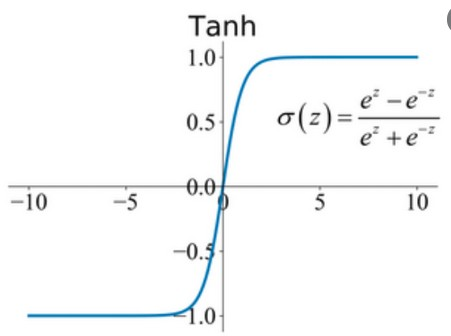

In [3]:
Image('Tanh_function.jpg')

### Costruzione della rete

In [6]:
model = Sequential()

model.add(
    LSTM(
        64,
        activation="tanh", 
        dropout=0.1,
        recurrent_dropout=0.1,
        return_sequences=True,
        input_shape=(12, 1),
    )
)

model.add(
    LSTM(
        32, 
        activation="tanh", 
        dropout=0.1, 
        recurrent_dropout=0.1
    )
)

model.add(Dense(1))

<IPython.core.display.Javascript object>

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 12, 64)            16896     
_________________________________________________________________
lstm_2 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 29,345
Trainable params: 29,345
Non-trainable params: 0
_________________________________________________________________


<IPython.core.display.Javascript object>

In [24]:
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.0001), loss="mse")

<IPython.core.display.Javascript object>

### Addestramento

In [25]:
model.fit(generator, steps_per_epoch=100, epochs=10)

Epoch 1/10
100/100 [==============================] - 11s 110ms/step - loss: 0.5390
Epoch 2/10
100/100 [==============================] - 9s 94ms/step - loss: 0.3579
Epoch 3/10
100/100 [==============================] - 8s 79ms/step - loss: 0.2727
Epoch 4/10
100/100 [==============================] - 11s 107ms/step - loss: 0.2330
Epoch 5/10
100/100 [==============================] - 10s 105ms/step - loss: 0.2290
Epoch 6/10
100/100 [==============================] - 13s 126ms/step - loss: 0.2255
Epoch 7/10
100/100 [==============================] - 13s 132ms/step - loss: 0.2377
Epoch 8/10
100/100 [==============================] - 8s 76ms/step - loss: 0.2388
Epoch 9/10
100/100 [==============================] - 11s 108ms/step - loss: 0.2350
Epoch 10/10
100/100 [==============================] - 11s 110ms/step - loss: 0.2377


<IPython.core.display.Javascript object>

### Previsione

In [26]:
inputs[:12].reshape(1, 12)

array([[-1.00044445, -0.89083416, -1.32723213, -1.84836881, -1.91506627,
        -1.40595591, -0.72906417, -0.44667494, -0.7583683 , -1.31752754,
        -1.55001698, -1.18203962]])

<IPython.core.display.Javascript object>

In [27]:
inputs[12]

array([-0.49186489])

<IPython.core.display.Javascript object>

In [28]:
model.predict(inputs[:12].reshape(1, 12, 1))

array([[-0.4625245]], dtype=float32)

<IPython.core.display.Javascript object>